# Analysis
Heart rate variability (HRV) analysis can be done in several ways, depending on the specific research question or clinical application. Some of the most commonly used HRV analysis techniques include:

1. Time domain analysis: This method involves analyzing the statistical properties of the interbeat intervals (IBIs) or RR intervals over a certain period of time. The most commonly used time domain measures include the mean RR interval, standard deviation of RR intervals (SDNN), root mean square of successive differences (RMSSD), and pNN50 (the percentage of successive RR intervals that differ by more than 50 ms).

2. Frequency domain analysis: This method involves transforming the time-domain signal into the frequency domain using techniques such as Fourier analysis. The resulting power spectrum is then analyzed to identify the frequency components of the signal. The most commonly used frequency domain measures include low-frequency (LF) power, high-frequency (HF) power, and the LF/HF ratio.

3. Nonlinear analysis: This method involves analyzing the complex dynamics of the HRV signal using nonlinear methods such as entropy analysis, fractal analysis, and detrended fluctuation analysis (DFA).

4. Time-frequency analysis: This method involves analyzing the HRV signal in both time and frequency domains using techniques such as wavelet analysis and spectrogram analysis. (Look up: Chan HL, Huang HH, Lin JL. Time-Frequency analysis of heart rate variability during transient segments. Ann Biomed Eng. 2001 Nov;29(11):983-96. doi: 10.1114/1.1415525. Erratum in: Ann Biomed Eng. 2002 Jul-Aug;30(7):985. PMID: 11791681.)

5. Poincare plot analysis: This method involves plotting each RR interval against the previous RR interval to visualize the temporal dynamics of the HRV signal. The resulting plot can be analyzed using measures such as SD1, SD2, and the SD1/SD2 ratio.

6. Heart rate turbulence (HRT) analysis: This method involves analyzing the beat-to-beat changes in heart rate following a premature ventricular contraction (PVC). The HRT parameters include turbulence onset (TO), turbulence slope (TS), and turbulence intensity (TI).

I will be using different libraries: 1. Scipy 2. Neurokit2 3. mne 4. Pandas 5. Numpy

Will compare functions for:

1. Time domain: SDNN, RMSSD, pNN50
2. Frequency Domain: Time Domain Signal into Frequency Domain using FFT (Fast Fourier Transform) and LF/HF ratio
3. Power Spectrum Density using RR peaks signal
4. Visualising HRV and ECG in time domain vs PSD

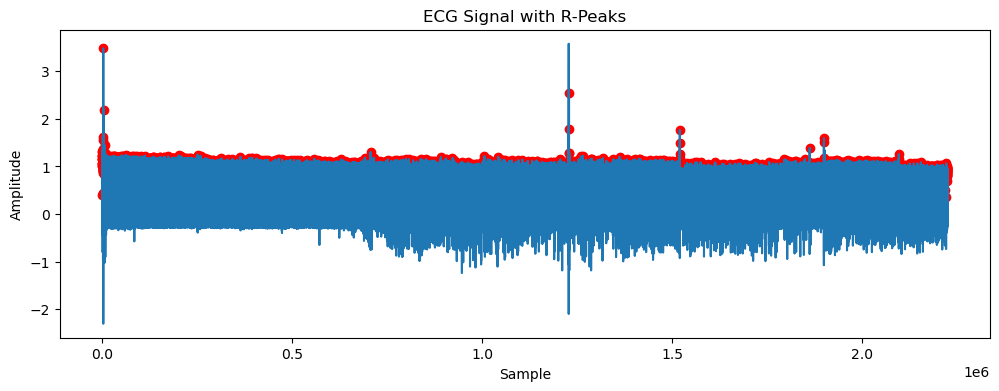

LF power:     HRV_ULF   HRV_VLF    HRV_LF   HRV_HF   HRV_VHF  HRV_LFHF   HRV_LFn  \
0  0.000434  0.001038  0.000653  0.00041  0.000014  1.594961  0.256236   

    HRV_HFn  HRV_LnHF  
0  0.160653 -7.800441  


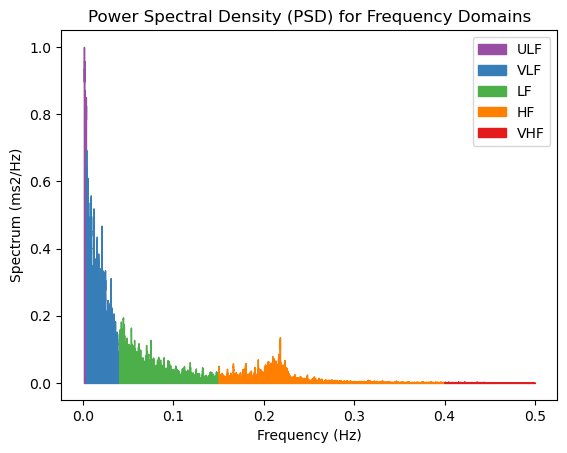

In [118]:
import neurokit2 as nk
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("c10.csv", usecols=["ECG"])
signal = np.concatenate(pd.DataFrame(df).to_numpy())

# Preprocess the ECG signal
cleaned_signal = nk.ecg_clean(signal, sampling_rate=100)

# Detect R-peaks in the cleaned ECG signal using the `nk.ecg_findpeaks` function
rpeaks = nk.ecg_findpeaks(signal, sampling_rate=100)["ECG_R_Peaks"]
#print(rpeaks)
# Create a new figure and plot the ECG signal
fig, ax = plt.subplots(figsize=(12,4))
ax.plot(signal)
# Add the R-peaks to the plot
ax.scatter(rpeaks, signal[rpeaks], color='red')

# Add axis labels and a title to the plot
ax.set_xlabel('Sample')
ax.set_ylabel('Amplitude')
ax.set_title('ECG Signal with R-Peaks')
plt.show()


hrv = nk.hrv_time(rpeaks, sampling_rate=100)
# Compute the low-frequency (LF) spectral power of the HRV signal
lf_power = nk.hrv_frequency(rpeaks, sampling_rate=100)


print("LF power:", lf_power)


# Compute the PSD of the HRV signal
# Compute HRV indices using method="welch"
hrv_welch = nk.hrv_frequency(rpeaks, sampling_rate=100, show=True, psd_method="multitapers")
# Plot the power spectrum

#psd = nk.hrv_frequency(rpeaks, sampling_rate=100, psd_method="welch")

# Plot the PSD
#fig, ax = plt.subplots(figsize=(12,4))
#ax.plot(psd["Frequency"], psd["Power"], lw=2, alpha=0.7, label="PSD")

# Highlight the LF and HF components of HRV
#ax.fill_betweenx([0, np.max(psd["Power"])], psd.loc[(psd["Frequency"] >= 0.04) & (psd["Frequency"] <= 0.15), "Frequency"], color="orange", alpha=0.5, label="LF")
#ax.fill_betweenx([0, np.max(psd["Power"])], psd.loc[(psd["Frequency"] >= 0.15) & (psd["Frequency"] <= 0.4), "Frequency"], color="purple", alpha=0.5, label="HF")

# Set plot parameters
#ax.set_xlabel("Frequency (Hz)")
#ax.set_ylabel("Power (ms^2/Hz)")
#ax.set_title("Power Spectral Density of HRV")
#plt.legend()
#plt.show()

In [34]:
import neurokit2 as nk
import inspect 

print(inspect.getsource(nk.hrv_frequency))
help(nk.hrv_frequency)

def hrv_frequency(
    peaks,
    sampling_rate=1000,
    ulf=(0, 0.0033),
    vlf=(0.0033, 0.04),
    lf=(0.04, 0.15),
    hf=(0.15, 0.4),
    vhf=(0.4, 0.5),
    psd_method="welch",
    show=False,
    silent=True,
    normalize=True,
    order_criteria=None,
    interpolation_rate=100,
    **kwargs
):
    """**Computes frequency-domain indices of Heart Rate Variability (HRV)**

    Computes frequency domain HRV metrics, such as the power in different frequency bands.

    * **ULF**: The spectral power of ultra low frequencies (by default, .0 to
      .0033 Hz). Very long signals are required for this to index to be
      extracted, otherwise, will return NaN.
    * **VLF**: The spectral power of very low frequencies (by default, .0033 to .04 Hz).
    * **LF**: The spectral power of low frequencies (by default, .04 to .15 Hz).
    * **HF**: The spectral power of high frequencies (by default, .15 to .4 Hz).
    * **VHF**: The spectral power of very high frequencies (by default, .4 to 

In [56]:
import pandas as pd
import neurokit2 as nk

df = pd.read_csv("a01_interpolated.csv", usecols=["ECG"])
signal = np.concatenate(pd.DataFrame(df).to_numpy())

# Preprocess the ECG signal
cleaned_signal = nk.ecg_clean(signal, sampling_rate=100)

# Interpolate the signal
interpolated_signal = nk.signal_interpolate(cleaned_signal)
# Detect R-peaks in the cleaned ECG signal
rpeaks = nk.ecg_findpeaks(cleaned_signal, sampling_rate=100)["ECG_R_Peaks"]
print(rpeaks)
# Compute the heart rate variability (HRV) time series
#hrv = nk.hrv_time(rpeaks, sampling_rate=100)

# Compute the low-frequency (LF) spectral power of the HRV signal
lf_power = nk.hrv_frequency(rpeaks, sampling_rate=100)


print("LF power:", lf_power)

[    114     198     281 ... 2956273 2956354 2956435]
LF power:     HRV_ULF   HRV_VLF   HRV_LF    HRV_HF   HRV_VHF  HRV_LFHF   HRV_LFn  \
0  0.000061  0.000593  0.00062  0.000614  0.000097  1.009281  0.312343   

    HRV_HFn  HRV_LnHF  
0  0.309471 -7.395517  


In [2]:
import os
os.chdir("/Users/marianarodrigues/Documents/Jupyter/ECG_only")

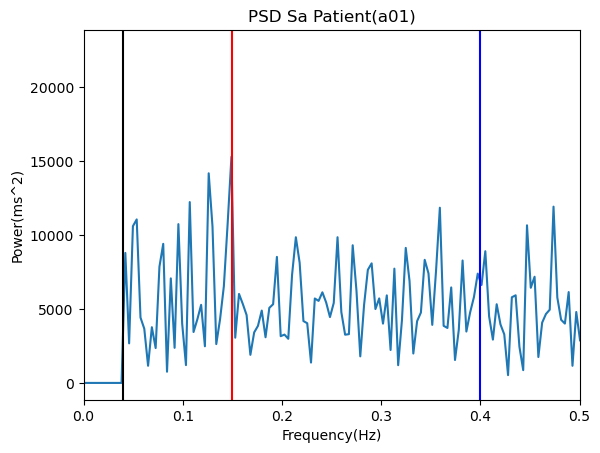

In [96]:
## fft and psd using last years code

import numpy as np
from numpy.fft import fft,ifft
import pandas as pd
import os
import matplotlib.pyplot as plt
import neurokit2 as nk
import scipy as sp
from scipy.fft import rfft, rfftfreq
from scipy.fft import irfft
from scipy.interpolate import interp1d

#folder = 'ECG_Only'
#access_folder = os.chdir(folder)

file = 'a01'
df = pd.read_csv(file+'.csv')
ECG = np.concatenate(pd.DataFrame(df['ECG']).to_numpy())
Time = np.concatenate(pd.DataFrame(df['Time']).to_numpy())

#### this can be used for sectioning if you want
#start_time = 1600
#stop_time = 1800
#start_location =int((np.where(Time == start_time)[0]))
#stop_location = int((np.where(Time == stop_time)[0]))
##
_, rpeaks = nk.ecg_peaks(ECG, sampling_rate = 100)
peaks = rpeaks['ECG_R_Peaks']
nn_intervals = np.diff(peaks)

#last years code
## Number of samples in normalized_tone
N = len(nn_intervals)
rate = 100
freq_values = pd.DataFrame()


 #Calculating fourier transforms
xf = rfftfreq(N, 1 / rate) # Returns the Discrete Fourier Transform sample frequencies
yf = np.abs(rfft(nn_intervals)) # Computes the one-dimensional discrete Fourier Transform for real input.
for index,value in enumerate(xf):
    if value < 0.04:
        yf[index] = 0
    
# Plotting Frequency Domain HRV values
plt.plot(xf, yf)
plt.xlabel('Frequency(Hz)')
plt.ylabel('Power(ms^2)')

#HF - 0.15-0.4, LF - 0.04-0.15
plt.axvline(x=0.040, color='k')
plt.axvline(x=0.15, color='r')
plt.axvline(x=0.40, color='b')
plt.xlim([0, 0.5])
plt.title('PSD Sa Patient(a01)')
plt.show()

In [16]:
import biosppy
import numpy as np
import matplotlib.pyplot as plt

# Load ECG data
df = pd.read_csv("a05.csv", usecols=["ECG"])
ecg_data = np.concatenate(pd.DataFrame(df).to_numpy())

# Preprocess ECG data
filtered_ecg = biosppy.signals.tools.filter_signal(signal=ecg_data, ftype='butter', band='lowpass', order=5, frequency=40)

# Detect R-peaks
rpeaks = biosppy.signals.ecg.hamilton_segmenter(signal=filtered_ecg, sampling_rate=100)['rpeaks']

# Compute R-R intervals
rr_intervals = np.diff(rpeaks)

# Calculate HRV parameters
hrv = biosppy.signals.ecg.hrv(rr_intervals=rr_intervals, rpeaks=rpeaks, method='welch')

# Visualize HRV parameters
plt.plot(hrv['time'], hrv['hr'], label='Heart rate')
plt.plot(hrv['time'], hrv['rmssd'], label='RMSSD')
plt.plot(hrv['time'], hrv['lf'], label='LF')
plt.plot(hrv['time'], hrv['hf'], label='HF')
plt.legend()
plt.show()


/Users/marianarodrigues/opt/anaconda3/lib/python3.9/site-packages/scipy/signal/_signaltools.py:4063: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x = np.asarray(x)


ValueError: The length of the input vector x must be greater than padlen, which is 15.

Try fixpeaks() so that we can more easily section

{'ECG_R_Peaks': array([     79,     153,     228, ..., 2700336, 2700420, 2700493]), 'sampling_rate': 100}


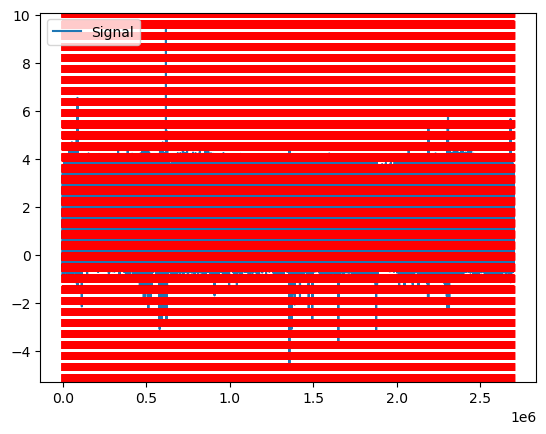

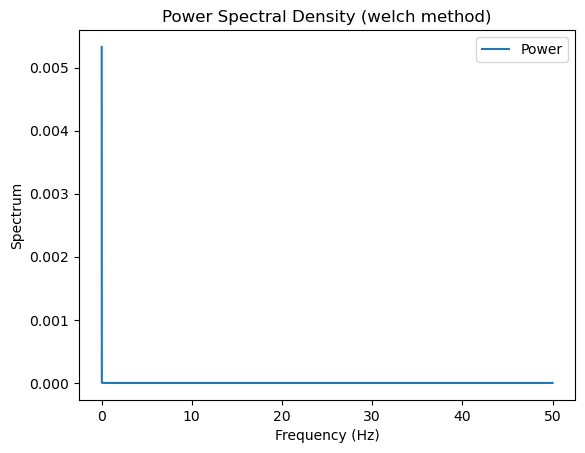

In [93]:
import neurokit2 as nk
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = pd.read_csv("a07.csv", usecols=["ECG"])
ecg = np.concatenate(pd.DataFrame(df).to_numpy())
#ecg = ecg[:1000]
#cleaned = nk.ecg_clean(ecg, sampling_rate=100)

rpeaks, info = nk.ecg_peaks(ecg, sampling_rate=100)

  # neurokit (default)
#cleaned = nk.ecg_clean(ecg, method="neurokit")
#_, neurokit = nk.ecg_peaks(cleaned, method="neurokit")
    
      # pantompkins1985
#cleaned = nk.ecg_clean(ecg, method="pantompkins1985")
#_, pantompkins1985 = nk.ecg_peaks(cleaned, method="pantompkins1985")
    
      # nabian2018
#_, nabian2018 = nk.ecg_peaks(ecg, method="nabian2018")
    
      # hamilton2002
#cleaned = nk.ecg_clean(ecg, method="hamilton2002")
#_, hamilton2002 = nk.ecg_peaks(cleaned, method="hamilton2002")
    
      # martinez2004
#_, martinez2004 = nk.ecg_peaks(ecg, method="martinez2004")
    
      # zong2003
#_, zong2003 = nk.ecg_peaks(ecg, method="zong2003")
    
      # christov2004
#_, christov2004 = nk.ecg_peaks(cleaned, method="christov2004")
    
      # gamboa2008
#cleaned = nk.ecg_clean(ecg, method="gamboa2008")
#_, gamboa2008 = nk.ecg_peaks(cleaned, method="gamboa2008")
    
      # elgendi2010
#cleaned = nk.ecg_clean(ecg, method="elgendi2010")
#_, elgendi2010 = nk.ecg_peaks(cleaned, method="elgendi2010")
    
      # engzeemod2012
#cleaned = nk.ecg_clean(ecg, method="engzeemod2012")
#_, engzeemod2012 = nk.ecg_peaks(cleaned, method="engzeemod2012")
    
      # kalidas2017
#cleaned = nk.ecg_clean(ecg, method="kalidas2017")
#_, kalidas2017 = nk.ecg_peaks(cleaned, method="kalidas2017")
    
      # rodrigues2021
#_,rodrigues2021 = nk.ecg_peaks(cleaned, method="rodrigues2021")
    
      # koka2022
#_, koka2022 = nk.ecg_peaks(ecg, method="koka2022")
    
      # Collect all R-peak lists by iterating through the result dicts
#rpeaks = [
#    i["ECG_R_Peaks"]
#    for i in [
#              neurokit,
#              pantompkins1985,
#              nabian2018,
#              hamilton2002,
#              martinez2004,
#              christov2004,
#              gamboa2008,
#              elgendi2010,
#              engzeemod2012,
#              kalidas2017,
#              rodrigues2021,
#              koka2022
#          ]
#      ]
#rpeaks=pantompkins1985["ECG_R_Peaks"]
#nk.events_plot(rpeaks, ecg)
nk.events_plot(info["ECG_R_Peaks"], ecg)
# Get the events indices for R-peaks
#events = nk.events_find(rpeaks, signal=cleaned)
# Plot the ECG signal with the R-peaks marked
#nk.events_plot(events, cleaned)
#plt.show()
# FFT method (based on numpy)
# Convert R-peaks to signal
print(info)

psd_fft = nk.signal_psd(info["ECG_R_Peaks"], sampling_rate=100, method="welch", show=True)

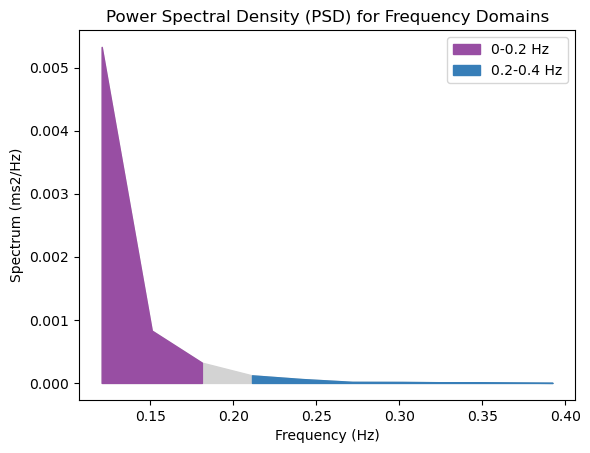

In [31]:
power_plot = nk.signal_power(info["ECG_R_Peaks"], frequency_band=[(0, 0.2), (0.2, 0.4)], method="welch", show=True)
##note: can compute instant frequency and continuous power by setting  continuous=True

rpeaks is a DataFrame of same length as the input signal in which occurences of R-peaks are marked with 1 in a list of zeros. 

info is a dictionary of the sample points at which these R-peaks occur.

In [35]:
print(info["ECG_R_Peaks"])
print(rpeaks["ECG_R_Peaks"])
print(len(info["ECG_R_Peaks"]))
print(len(rpeaks["ECG_R_Peaks"]))

[     79     153     228 ... 2700336 2700420 2700493]
0          0
1          0
2          0
3          0
4          0
          ..
2700495    0
2700496    0
2700497    0
2700498    0
2700499    0
Name: ECG_R_Peaks, Length: 2700500, dtype: int64
33139
2700500


,HRV_MeanNN,HRV_SDNN,HRV_SDANN1,HRV_SDNNI1,HRV_SDANN2,HRV_SDNNI2,HRV_SDANN5,HRV_SDNNI5,HRV_RMSSD,HRV_SDSD,...,HRV_MCVNN,HRV_IQRNN,HRV_Prc20NN,HRV_Prc80NN,HRV_pNN50,HRV_pNN20,HRV_MinNN,HRV_MaxNN,HRV_HTI,HRV_TINN
0,760.833333,18.319554,NaN,NaN,NaN,NaN,NaN,NaN,12.792043,12.135598,...,0.019637,22.5,750.0,778.0,0.0,0.0,740.0,800.0,3.0,23.4375


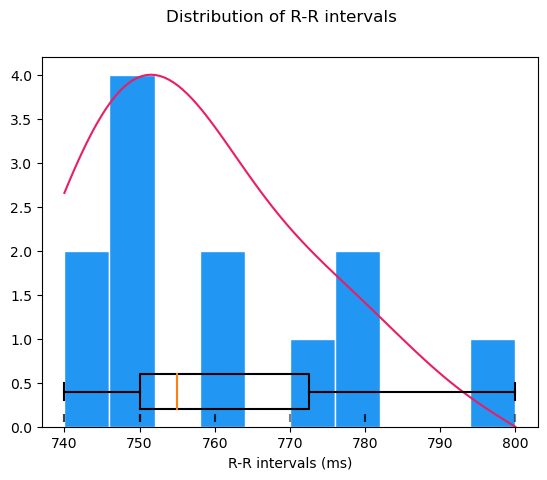

In [27]:
hrv_time = nk.hrv_time(rpeaks, sampling_rate=100, show=True)
hrv_time

In [47]:
# Calculate RR intervals in seconds
rr_intervals = np.diff(info["ECG_R_Peaks"]) / 100

# Convert RR intervals to milliseconds
rr_intervals_ms = rr_intervals * 1000

# Convert RR intervals to a pandas DataFrame
rr_intervals_df = pd.DataFrame(rr_intervals_ms, columns=['RR_Intervals'])
rr_intervals_np = np.concatenate(pd.DataFrame(df).to_numpy())
print(rr_intervals_df)

       RR_Intervals
0             740.0
1             750.0
2             740.0
3             750.0
4             750.0
...             ...
33133         830.0
33134         830.0
33135         830.0
33136         840.0
33137         730.0

[33138 rows x 1 columns]


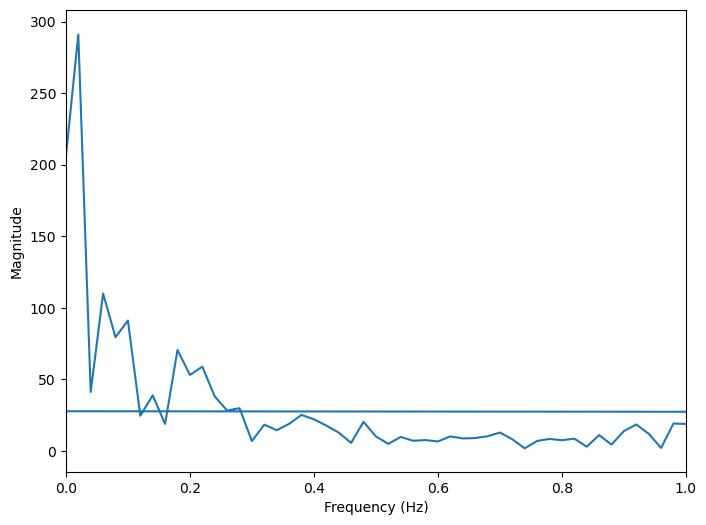

In [91]:
# Calculate the Fourier transform of the HRV time series
rr_intervals_np=rr_intervals_np - np.mean(rr_intervals_np)
t = np.arange(0, len(rr_intervals_np[0:5000])) / 100
freq = np.fft.fftfreq(len(rr_intervals_np[0:5000]), t[1] - t[0])  # frequency values
fft = np.fft.fft(rr_intervals_np[0:5000])  # Fourier transform of HRV time series

# Plot the Fourier transform
plt.figure(figsize=(8, 6))
plt.plot(freq, np.abs(fft))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.xlim([0, 1])
plt.show()

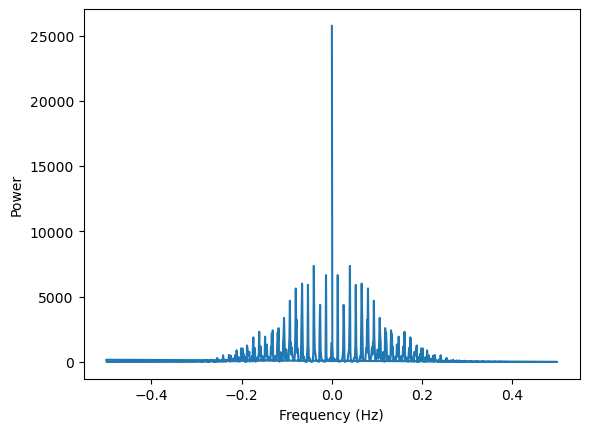

In [95]:
import matplotlib.pyplot as plt
import numpy as np

rr_intervals_np=rr_intervals_np - np.mean(rr_intervals_np)

# Calculate the FFT of the HRV series
fft = np.fft.fft(rr_intervals_np[0:1000])
power_spectrum = np.abs(fft) ** 2

# Calculate the frequencies corresponding to each FFT coefficient
freqs = np.fft.fftfreq(len(rr_intervals_np[0:1000]))

# Plot the power spectrum
plt.plot(freqs, power_spectrum)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power")
plt.show()

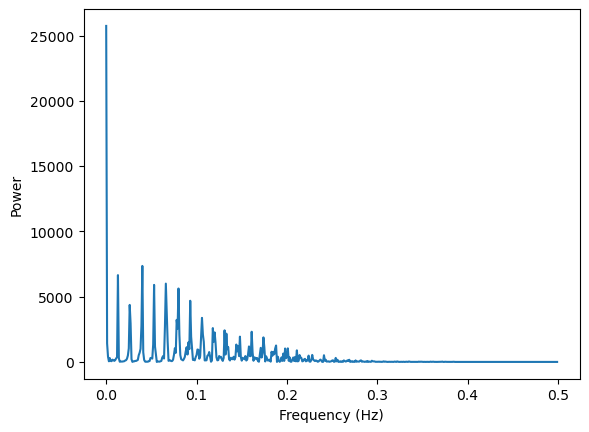

In [96]:
#only positive side
positive_freqs = freqs[:len(freqs)//2]
positive_power = power_spectrum[:len(power_spectrum)//2]

plt.plot(positive_freqs, positive_power)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power")
plt.show()

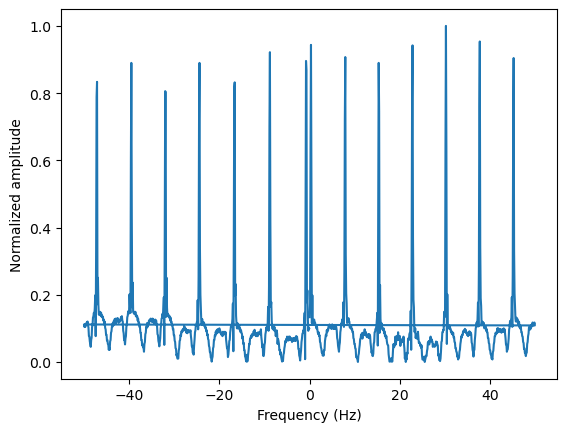

In [97]:
# Compute the FFT and normalize the amplitude
rr_intervals_np=rr_intervals_np - np.mean(rr_intervals_np)
fft = np.fft.fft(rr_intervals_np[0:1000])
magnitude = np.abs(rr_intervals_np[0:1000]) / np.max(np.abs(rr_intervals_np[0:1000]))

# Compute the frequency axis in Hz
freq = np.fft.fftfreq(len(rr_intervals_np[0:1000]), d=t[1]-t[0])

# Plot the normalized FFT
plt.plot(freq, magnitude)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Normalized amplitude')
plt.show()

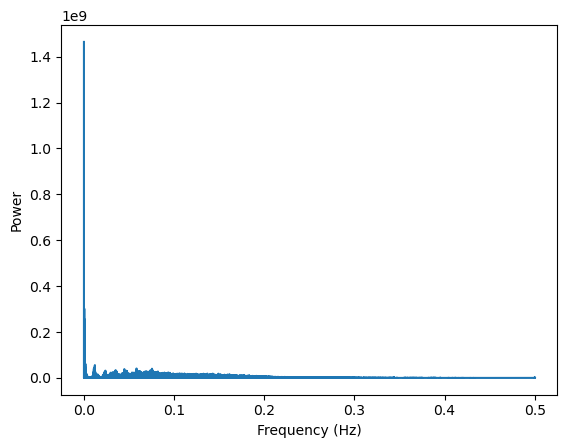

In [57]:
positive_freqs = freqs[:len(freqs)//2]
positive_power = power_spectrum[:len(power_spectrum)//2]

plt.plot(positive_freqs, positive_power)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power")
plt.show()

"ECG_Rate": heart rate interpolated between R-peaks.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


      0.12-0.15Hz  0.15-0.40Hz   ECG_Rate
0        0.093067     0.942400  73.887150
1        0.093090     0.943570  73.887150
2        0.093112     0.944731  73.887150
3        0.093135     0.945882  73.887150
4        0.093157     0.947023  73.887150
...           ...          ...        ...
9995     0.345171     0.067455  72.289157
9996     0.344428     0.067395  72.289157
9997     0.343685     0.067334  72.289157
9998     0.342943     0.067273  72.289157
9999     0.342202     0.067211  72.289157

[10000 rows x 3 columns]
      ECG_Raw  ECG_Clean   ECG_Rate  ECG_Quality  ECG_R_Peaks  ECG_P_Peaks  \
0      -0.475  -0.020016  73.887150     0.890809            0            0   
1       0.585   1.169584  73.887150     0.890809            0            0   
2       2.180   2.494175  73.887150     0.890809            0            0   
3       3.245   3.036253  73.887150     0.890809            0            0   
4       1.705   1.998321  73.887150     0.890809            0            0   
..

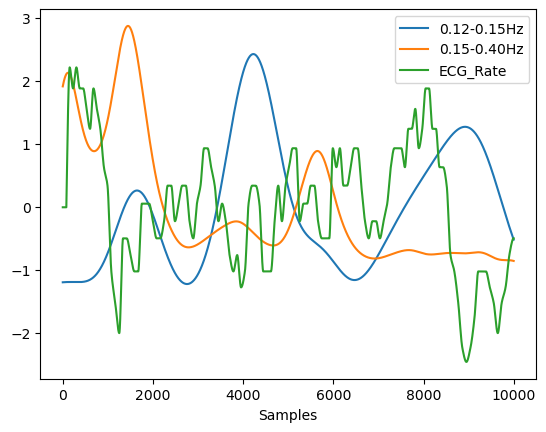

In [74]:
df = pd.read_csv("a07.csv", usecols=["ECG"])
ecg = np.concatenate(pd.DataFrame(df).to_numpy())
ecg=ecg[0:10000]
power = nk.signal_power(ecg, sampling_rate=100, frequency_band=[(0.12, 0.15), (0.15, 0.4)], continuous=True)

processed, _ = nk.ecg_process(ecg, sampling_rate=100)

#"ECG_Rate": heart rate interpolated between R-peaks.
power["ECG_Rate"] = processed["ECG_Rate"]

nk.signal_plot(power, standardize=True)
print(power)
print(processed)

In [67]:
import neurokit2

print(dir(neurokit2))
help(neurokit2.ecg_peaks)
help(neurokit2.signal_psd)

['NeuroKitWarning', '__author__', '__bibtex__', '__builtins__', '__cached__', '__citation__', '__cite__', '__doc__', '__email__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '__version__', 'as_vector', 'benchmark', 'benchmark_ecg_preprocessing', 'bio', 'bio_analyze', 'bio_process', 'check_type', 'cite', 'cluster', 'cluster_findnumber', 'cluster_quality', 'complexity', 'complexity_apen', 'complexity_atten', 'complexity_attractor', 'complexity_capen', 'complexity_cd', 'complexity_cmse', 'complexity_coarsegraining', 'complexity_cren', 'complexity_decorrelation', 'complexity_delay', 'complexity_dfa', 'complexity_diffen', 'complexity_dimension', 'complexity_embedding', 'complexity_fuzzyapen', 'complexity_fuzzycmse', 'complexity_fuzzyen', 'complexity_fuzzymse', 'complexity_fuzzyrcmse', 'complexity_hjorth', 'complexity_k', 'complexity_lempelziv', 'complexity_lyapunov', 'complexity_lzc', 'complexity_mfdfa', 'complexity_mplzc', 'complexity_mse', 'complexity_mspe

In [32]:
import os
import inspect
import neurokit2 as nk

print(inspect.getsource(nk.signal_psd))
help(nk.signal_psd)

def signal_psd(
    signal,
    sampling_rate=1000,
    method="welch",
    show=False,
    normalize=True,
    min_frequency="default",
    max_frequency=np.inf,
    window=None,
    window_type="hann",
    order=16,
    order_criteria="KIC",
    order_corrected=True,
    silent=True,
    t=None,
    **kwargs,
):
    """**Compute the Power Spectral Density (PSD)**

    Parameters
    ----------
    signal : Union[list, np.array, pd.Series]
        The signal (i.e., a time series) in the form of a vector of values.
    sampling_rate : int
        The sampling frequency of the signal (in Hz, i.e., samples/second).
    method : str
        Either ``"welch"`` (default), ``"fft"``, ``"multitapers"`` (requires the 'mne' package),
        ``"lombscargle"`` (requires the 'astropy' package) or ``"burg"``.
    show : bool
        If ``True``, will return a plot. If ``False``, will return the density values that can be
        plotted externally.
    normalize : bool
        Normalization of pow

# Changing R_Peaks from Samples to time

In [21]:
sfreq = 100

# Convert R-peak locations to time
r_peak_times = info["ECG_R_Peaks"] / sfreq

# Print the first 10 R-peak times
print(r_peak_times[:10])

[0.79 1.53 2.28 3.02 3.77 4.52 5.29 6.05 6.8  7.56]


{'ECG_R_Peaks': array([     79,     153,     228, ..., 2700336, 2700420, 2700493]), 'sampling_rate': 100}


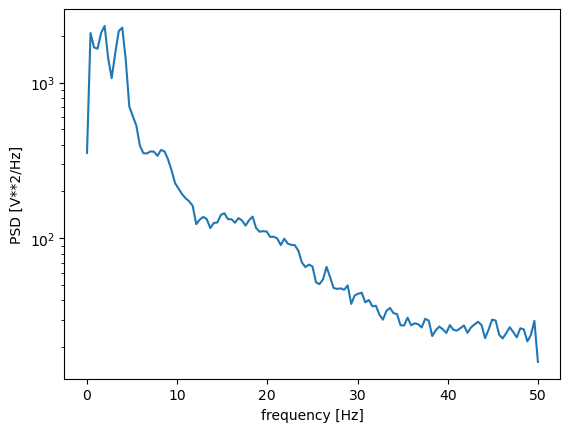

In [84]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
print(info)

## note: I thought r_peak_times would make a difference but no
f, Pxx_den = signal.welch(rr_intervals_ms, 100)
plt.semilogy(f, Pxx_den)
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()

In [114]:
import scipy
help(scipy.signal.welch)

Help on function welch in module scipy.signal._spectral_py:

welch(x, fs=1.0, window='hann', nperseg=None, noverlap=None, nfft=None, detrend='constant', return_onesided=True, scaling='density', axis=-1, average='mean')
    Estimate power spectral density using Welch's method.
    
    Welch's method [1]_ computes an estimate of the power spectral
    density by dividing the data into overlapping segments, computing a
    modified periodogram for each segment and averaging the
    periodograms.
    
    Parameters
    ----------
    x : array_like
        Time series of measurement values
    fs : float, optional
        Sampling frequency of the `x` time series. Defaults to 1.0.
    window : str or tuple or array_like, optional
        Desired window to use. If `window` is a string or tuple, it is
        passed to `get_window` to generate the window values, which are
        DFT-even by default. See `get_window` for a list of windows and
        required parameters. If `window` is arr

In [106]:
import numpy as np
from mne.time_frequency import psd_array_welch

def compute_psd(signal, sampling_rate, min_frequency=0, max_frequency=None):
    # Compute PSD
    psd, frequency = psd_multitaper(signal, sfreq=100, adaptive=True, normalization="full")

    # Trim to min and max frequencies
    frequency, psd = _trim_frequency(frequency, psd, min_frequency=0, max_frequency=0.5)

    # Convert to numpy array
    frequency = np.array(frequency)
    psd = np.array(psd)

    return frequency, psd

def _trim_frequency(frequency, psd, min_frequency=0, max_frequency=0.5):
    # Find the indices of the frequency array corresponding to min and max frequencies
    min_index = np.where(frequency >= min_frequency)[0][0]
    if max_frequency is not None:
        max_index = np.where(frequency <= max_frequency)[0][-1] + 1
    else:
        max_index = len(frequency)

    # Trim the frequency and psd arrays
    frequency = frequency[min_index:max_index]
    psd = psd[..., min_index:max_index]

    return frequency, psd


In [40]:
import mne
import inspect
print(dir(mne.time_frequency))
print(inspect.getsource(mne.time_frequency.psd))
help(mne.time_frequency.psd)


['AverageTFR', 'CrossSpectralDensity', 'EpochsSpectrum', 'EpochsTFR', 'Spectrum', '_BaseTFR', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '_stft', '_stockwell', 'ar', 'csd', 'csd_array_fourier', 'csd_array_morlet', 'csd_array_multitaper', 'csd_fourier', 'csd_morlet', 'csd_multitaper', 'csd_tfr', 'dpss_windows', 'fit_iir_model_raw', 'fwhm', 'istft', 'morlet', 'multitaper', 'pick_channels_csd', 'psd', 'psd_array_multitaper', 'psd_array_welch', 'read_csd', 'read_spectrum', 'read_tfrs', 'spectrum', 'stft', 'stftfreq', 'tfr', 'tfr_array_morlet', 'tfr_array_multitaper', 'tfr_array_stockwell', 'tfr_morlet', 'tfr_multitaper', 'tfr_stockwell', 'write_tfrs']
# Authors : Alexandre Gramfort, alexandre.gramfort@inria.fr (2011)
#           Denis A. Engemann <denis.engemann@gmail.com>
# License : BSD-3-Clause

from functools import partial

import numpy as np

from ..parallel import parallel_func
from ..utils import logger, ver

In [29]:
import mne
psds, freqs = mne.time_frequency.psd_array_welch(info["ECG_R_Peaks"], sfreq=100)
plt.plot(freqs, psds)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power Spectral Density")
plt.show()


ValueError: If n_per_seg is None n_fft is not allowed to be > n_times. If you want zero-padding, you have to set n_per_seg to relevant length. Got n_fft of 256 while signal length is 13.